<a href="https://colab.research.google.com/github/jm12312/PRODIGY_ML_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 2.41MB/s]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [11]:
df.replace({'Female': 0, 'Male': 1}, inplace=True)

<ipython-input-11-9dfe57147d01>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Female': 0, 'Male': 1}, inplace=True)


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

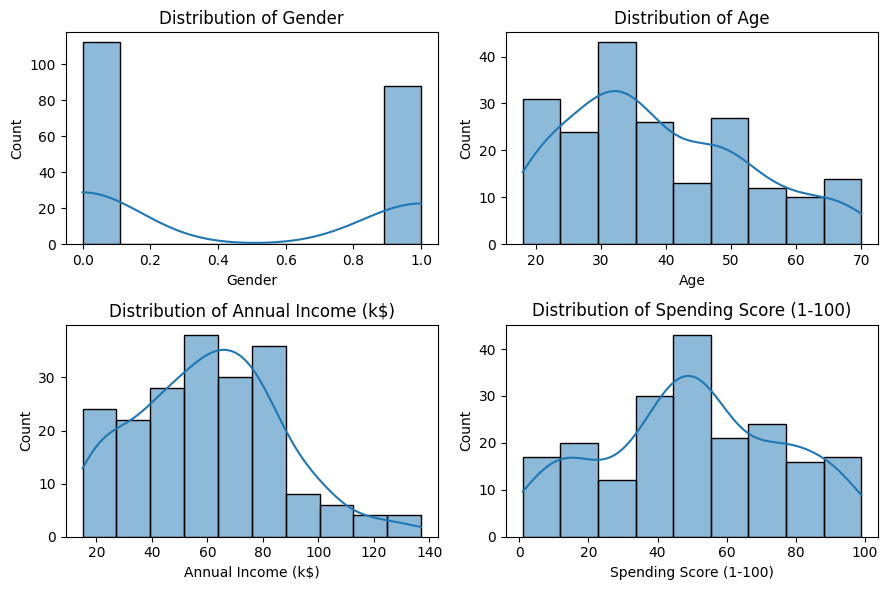

In [14]:
plt.figure(figsize=(9, 6))

# Initialize counter for subplot index
c = 0
for col in df.columns:
    c += 1
    plt.subplot(2, 2, c)  # 2x2 grid of subplots
    sns.histplot(df[col], kde=True)  # Plot the histogram with KDE

    plt.title(f'Distribution of {col}')  # Add a title for each subplot

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [15]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

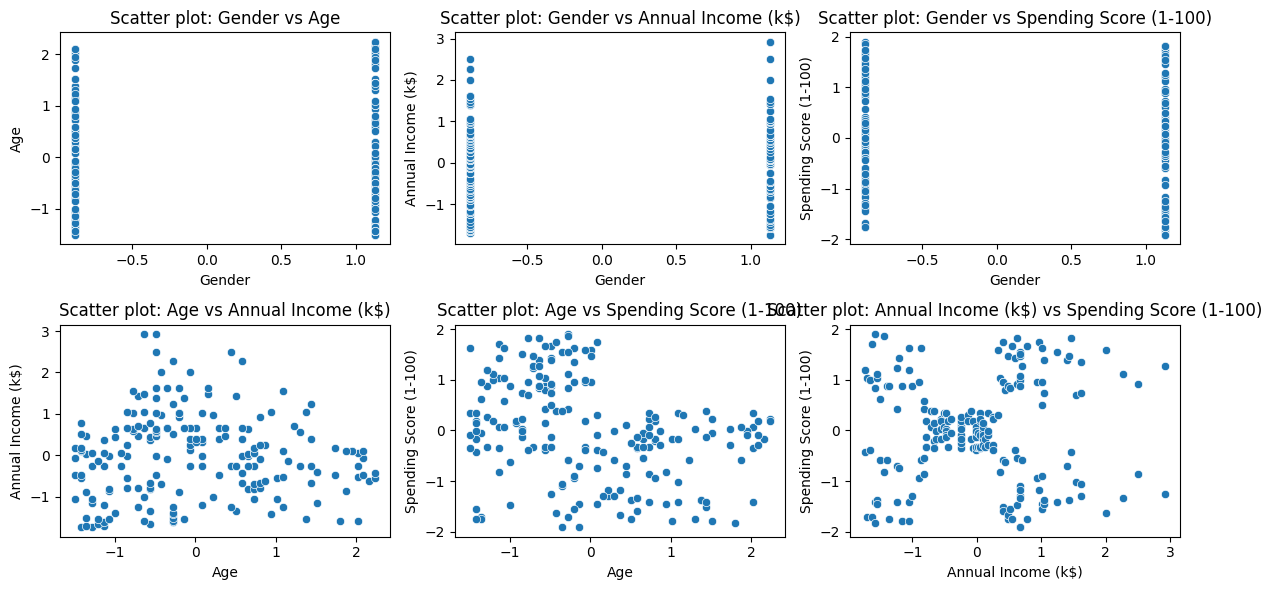

In [20]:
num_columns = df_scaled.shape[1]

# Create the subplots
plt.figure(figsize=(12, 6))

# Initialize a counter for subplot indexing
c = 0

# Loop through pairs of columns to create scatter plots
for i in range(num_columns):
    for j in range(i + 1, num_columns):  # j > i to avoid duplicate plots
        c += 1
        plt.subplot(2, 3, c)  # Subplot grid arrangement
        sns.scatterplot(x=df_scaled.iloc[:, i], y=df_scaled.iloc[:, j])  # Scatter plot between two columns
        plt.xlabel(df_scaled.columns[i])
        plt.ylabel(df_scaled.columns[j])
        plt.title(f'Scatter plot: {df_scaled.columns[i]} vs {df_scaled.columns[j]}')

plt.tight_layout()  # Adjust the layout to prevent overlapping subplots
plt.show()

In [25]:
X = df_scaled[['Annual Income (k$)', "Spending Score (1-100)"]].values

In [24]:
X.shape

(200,)

<ipython-input-39-10ee30fbf29d>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


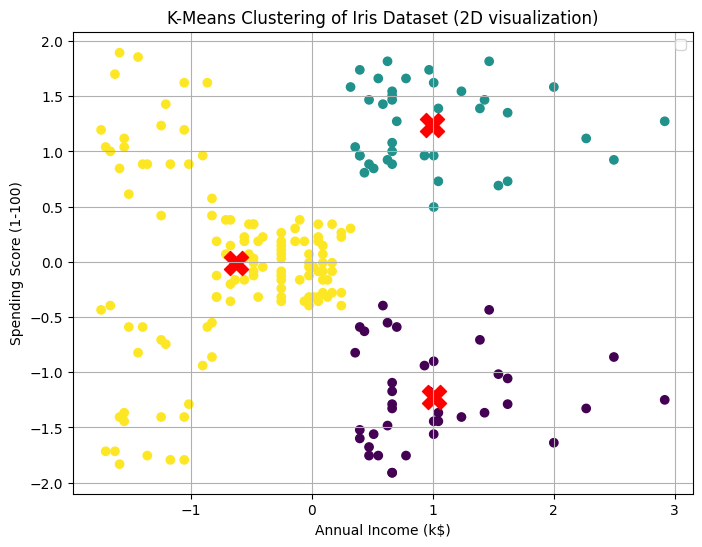

Cluster Centers: 
[[ 1.00919971 -1.22553537]
 [ 0.99158305  1.23950275]
 [-0.62618966 -0.01439238]]


In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
y = kmeans.fit_predict(X)
# print(y)
# Visualize the clusters (using only the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X')  # Plot the cluster centers
plt.grid(True)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('K-Means Clustering of Iris Dataset (2D visualization)')
plt.show()

# Output cluster centers and labels
print("Cluster Centers: ")
print(cluster_centers)


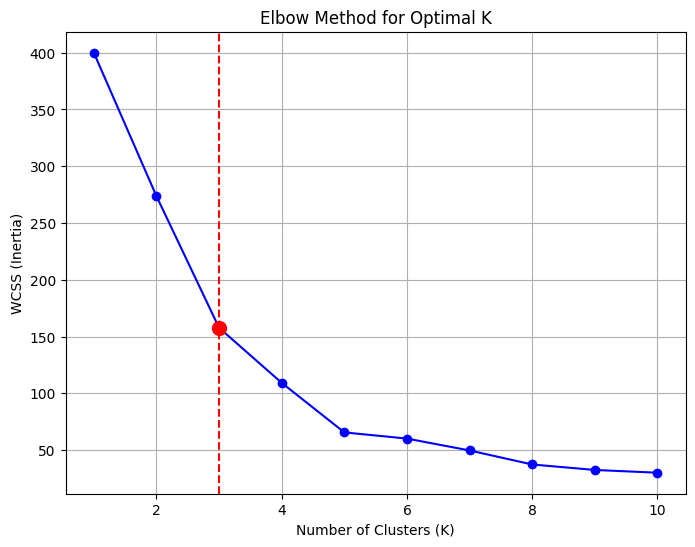

The optimal number of clusters is: 3


In [38]:
wcss = []  # List to hold the WCSS values

# Test for a range of cluster numbers
for k in range(1, 11):  # Try k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

first_diff = np.diff(wcss)  # First difference
second_diff = np.diff(first_diff)  # Second difference

# Find the optimal k (where the second difference is maximum)
optimal_k = np.argmax(second_diff) + 2



# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', s=100, zorder=5)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()
print(f"The optimal number of clusters is: {optimal_k}")